# Introduction

The goal of this notebook will be to show how GDP and Life Expectancy relate to each other by country. 

### Data Sources

GDP Source: World Bank national accounts data, and OECD National Accounts data files. URL: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

Life expectancy Data Source: World Health Organization URL: http://apps.who.int/gho/data/node.main.688

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('all_data.csv')


## The first section will be to inspect the Data.  We will want to see the differenct columns and unique values as well as the time frame we are working with. 

In [87]:
print(df.head())

print(df.columns.values)

print(df.dtypes)

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10
['Country' 'Year' 'LEABY' 'GDP']
Country     object
Year         int64
LEABY      float64
GDP        float64
dtype: object


In [11]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [12]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Rename the column 'Life expectancy at birth (years)' to a more workable column name.

In [14]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


## In this next section we will get a sense of some of the data by using various kinds of plots and graphs.

First, we will get the means of each countrys' Life Expectancy and GDP

In [20]:
df_means = df.drop('Year', axis=1).groupby('Country').mean().reset_index()

df_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


### We will use a bar graph to give a better visual of the above data.

Text(0.5, 1.0, 'Average GDP by Country')

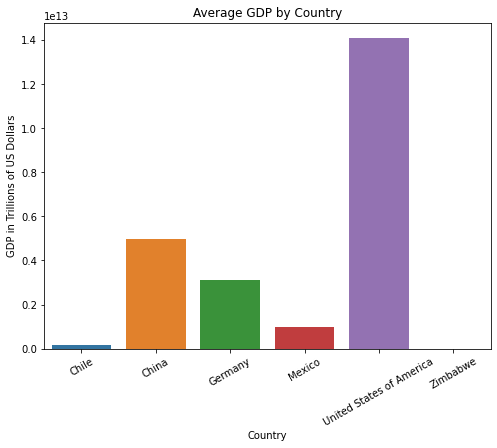

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_means, x='Country', y='GDP')
plt.xticks(rotation=30)
plt.ylabel('GDP in Trillions of US Dollars')
plt.title('Average GDP by Country')

This graph shows that the average GDP is very high in countries like the US and China, but barely noticeable in countries like Chile and Zimbabwe. 

### Next, we will show the average life expectancy for each country

Text(0.5, 1.0, 'Average Life Expectancy by Country')

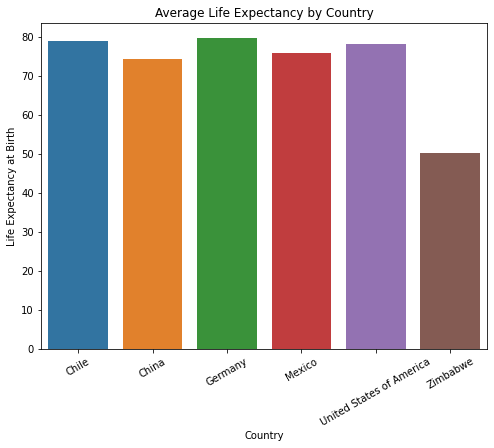

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_means, x='Country', y='LEABY')
plt.xticks(rotation=30)
plt.ylabel('Life Expectancy at Birth')
plt.title('Average Life Expectancy by Country')

This graph shows a more even distribtuion of life expectancy, with the exception of Zimbabwe. 

### Next we will examine GDP over time

Text(0.5, 1.0, 'GDP over Time')

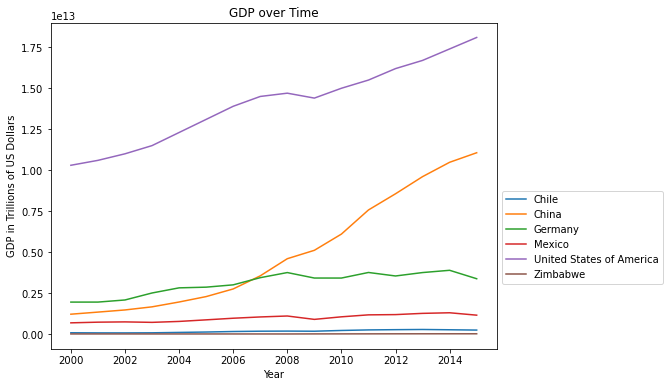

In [49]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel('GDP in Trillions of US Dollars')
plt.title('GDP over Time')

Text(0.5, 1.0, 'Life Expectancy over Time')

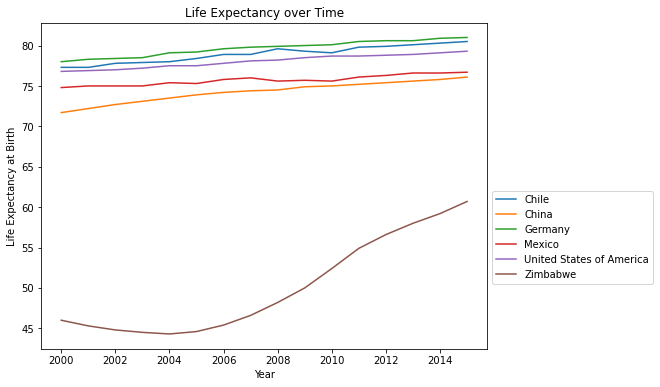

In [48]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Year', y='LEABY', hue='Country')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel('Life Expectancy at Birth')
plt.title('Life Expectancy over Time')

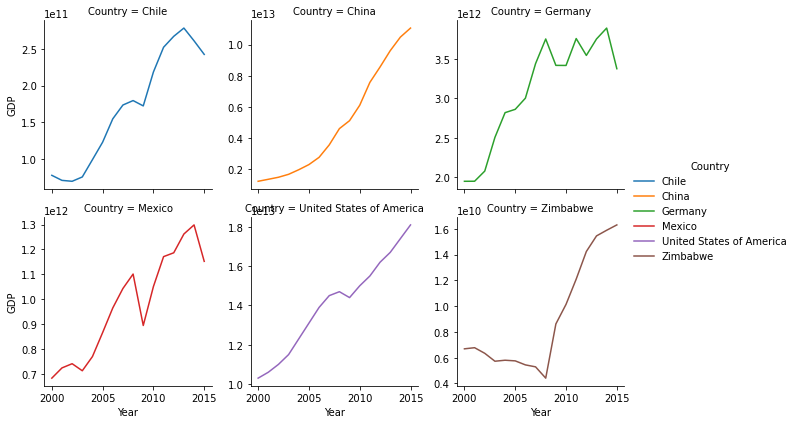

In [47]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, sharey=False, hue='Country')

graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP').add_legend())



### This next graph will examine the GDP distribution by country

Text(0.5, 1.0, 'Distribution of GDP by Country')

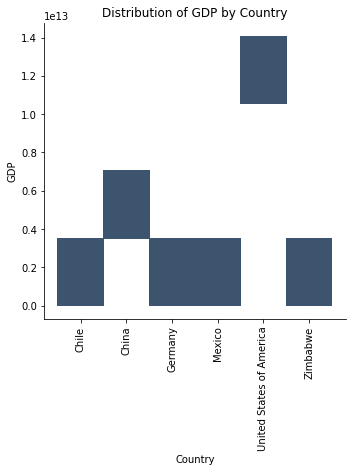

In [68]:
sns.displot(data=df_means, x='Country', y='GDP')
plt.xticks(rotation=90)
plt.title('Distribution of GDP by Country')

As we can see this graph shows the distribution of GDP is not even.  Countries like Zimbabwe and Chile have a very small distribution of GDP while the US and China have a much greater distribution. 

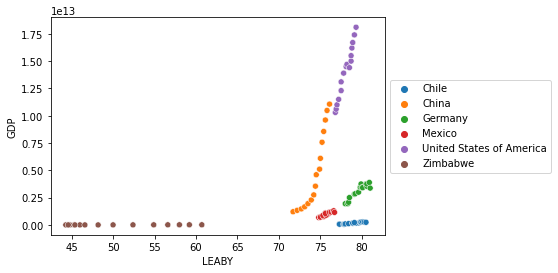

In [69]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

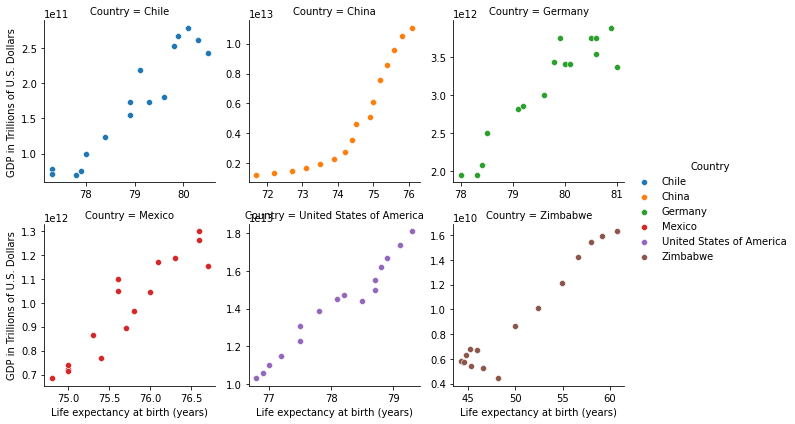

In [70]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

The two graphs above show a positive coorelation between GDP and Life Expectancy.  Most of the coutnries' growth is linear, with the exception of China which seems to be more exponential.  

In [86]:
gdp_df = pd.read_csv('GDP_Data.csv')

print(gdp_df)
print(gdp_df.dtypes)


   Country      Total_GDP
0     Chile  2.716620e+12
1     China  7.932340e+13
2  Germany   4.951640e+13
3    Mexico  1.562640e+13
4        US  2.252000e+14
5  Zimbabwe  1.450010e+11
Country       object
Total_GDP    float64
dtype: object


Text(0.5, 1.0, 'Total GDP from 2000-2014')

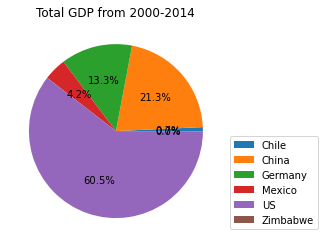

In [103]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'US', 'Zimbabwe']
gdp = [2.716620e+12, 7.932340e+13, 4.951640e+13, 1.562640e+13, 2.252000e+14, 1.450010e+11]

plt.pie(gdp, autopct='%0.1f%%')
plt.legend(countries, loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Total GDP from 2000-2014')


Above, we can see the that US owns the vast majority of total GDP.  Showing that there is little distribution across these vairous nations.

# Conclusions

From these findings, a few things are clear:
* There is a strong coorelation between a high GDP and a high life expectancy. 
* Westernized countries share a vast majority of the GDP.
* African countries like Zimbabwe are increasing in GDP, but not at the same rate as countires like China.

Further research must be done in order to understand why GDP has such an impact on life expectancy.